# Song Recommender

## Scraping the top100 songs(billboard hot songs)

In [24]:
import pandas as pd

In [25]:
# 1. importing libraries- BeautifulSoup, requests

from bs4 import BeautifulSoup
import requests 


# 2. find url and store it in avariable
url = "https://www.billboard.com/charts/hot-100"

# 3. download html with a get request
response = requests.get(url)

In [26]:
response.status_code

200

In [27]:
soup=BeautifulSoup(response.content, 'html.parser')

In [28]:
#prettify the soup 
print(soup.prettify())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
# scrapped code for the songs
song_list = soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary")
song_list

[<span class="chart-element__information__song text--truncate color--primary">Butter</span>,
 <span class="chart-element__information__song text--truncate color--primary">Good 4 U</span>,
 <span class="chart-element__information__song text--truncate color--primary">Levitating</span>,
 <span class="chart-element__information__song text--truncate color--primary">Kiss Me More</span>,
 <span class="chart-element__information__song text--truncate color--primary">Montero (Call Me By Your Name)</span>,
 <span class="chart-element__information__song text--truncate color--primary">Bad Habits</span>,
 <span class="chart-element__information__song text--truncate color--primary">Leave The Door Open</span>,
 <span class="chart-element__information__song text--truncate color--primary">Peaches</span>,
 <span class="chart-element__information__song text--truncate color--primary">Save Your Tears</span>,
 <span class="chart-element__information__song text--truncate color--primary">Deja Vu</span>,
 <span

In [30]:
# the number of the songs
len(song_list)

100

In [31]:
# loop to iterarte over all the song
songs = []
for p in song_list: 
    songs.append((p.get_text()))   

In [32]:
# artist list
artist_list = soup.select('span.chart-element__information__artist.text--truncate.color--secondary')
artist_list

[<span class="chart-element__information__artist text--truncate color--secondary">BTS</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Olivia Rodrigo</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Dua Lipa Featuring DaBaby</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Doja Cat Featuring SZA</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Lil Nas X</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Ed Sheeran</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Silk Sonic (Bruno Mars &amp; Anderson .Paak)</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">Justin Bieber Featuring Daniel Caesar &amp; Giveon</span>,
 <span class="chart-element__information__artist text--truncate color--secondary">The Weeknd &a

In [33]:
# number artist
len(artist_list)

100

In [34]:
artists = []
for a in artist_list: 
    artists.append((a.get_text()))

In [35]:
# [song.get_text() for song in songs]

In [36]:
artists

['BTS',
 'Olivia Rodrigo',
 'Dua Lipa Featuring DaBaby',
 'Doja Cat Featuring SZA',
 'Lil Nas X',
 'Ed Sheeran',
 'Silk Sonic (Bruno Mars & Anderson .Paak)',
 'Justin Bieber Featuring Daniel Caesar & Giveon',
 'The Weeknd & Ariana Grande',
 'Olivia Rodrigo',
 'Masked Wolf',
 'Polo G',
 'Doja Cat & The Weeknd',
 'Aaron Lewis',
 'The Weeknd',
 'The Kid LAROI',
 'Megan Thee Stallion',
 'Luke Combs',
 'Giveon',
 'Walker Hayes',
 'DJ Khaled Featuring Lil Baby & Lil Durk',
 'Chris Young + Kane Brown',
 'Maroon 5 Featuring Megan Thee Stallion',
 'Saweetie Featuring Doja Cat',
 'Nelly & Florida Georgia Line',
 'Cole Swindell',
 'Glass Animals',
 'Marshmello X Jonas Brothers',
 'Drake Featuring Lil Baby',
 'Bad Bunny',
 'Jason Aldean',
 'Roddy Ricch',
 'Olivia Rodrigo',
 'Kali Uchis',
 'Dan + Shay',
 '24kGoldn Featuring iann dior',
 'Moneybagg Yo',
 'Olivia Rodrigo',
 'Rauw Alejandro',
 'Chase Rice Featuring Florida Georgia Line',
 'Doja Cat',
 'Ariana Grande',
 'Machine Gun Kelly X blackbear',

In [37]:
# creating a dataframe to save the song and artist
songs_top100=pd.DataFrame({"song":songs,"artist":artists})

In [38]:
songs_top100.shape

(100, 2)

In [39]:
# the dataframe 
songs_top100.head(10)

,song,artist
0,Butter,BTS
1,Good 4 U,Olivia Rodrigo
2,Levitating,Dua Lipa Featuring DaBaby
3,Kiss Me More,Doja Cat Featuring SZA
4,Montero (Call Me By Your Name),Lil Nas X
5,Bad Habits,Ed Sheeran
6,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
7,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
8,Save Your Tears,The Weeknd & Ariana Grande
9,Deja Vu,Olivia Rodrigo


In [40]:
import random

In [41]:
# Formatting the name and artist str 
# converting all the strings into lower case
songs_top100["song"] = songs_top100["song"].apply(lambda x: x.lower())
songs_top100["artist"] = songs_top100["artist"].apply(lambda x: x.lower())

In [42]:
songs_top100.head(3)

,song,artist
0,butter,bts
1,good 4 u,olivia rodrigo
2,levitating,dua lipa featuring dababy


In [ ]:
## song and artist code
for song in songs_top100[["song","artist"]].iterrows():
    user_input = input("Write down a song or artist to get a recommendation: ")
    if user_input.lower() in list(songs_top100["song"]):
        random_song = random.choice(songs_top100["song"]).title()
        song_artist = songs_top100.loc[songs_top100["song"] == random.choice(songs_top100["song"]), "artist"].values[0]
        
        print("You may also like this song: ", random_song, "from", song_artist.title())
        print("Thanks for using the music recommender.")
        break
    elif user_input.lower() in list(songs_top100["artist"]) or songs_top100["artist"].str.contains(user_input).any():
        print("You may also like this artist: ", random.choice(songs_top100["artist"]).title())
        print("Thanks for using the music recommender.")
        break
    elif user_input not in songs_top100[["name","artist"]].iterrows():
        print("Sorry, we cannot make any recommendations of this song yet. Try with another hot song or artist:")
        continue

In [ ]:
# function for the first prototype which means selecting any one from the billboard hot song
def user_song():
    u_song=input("Which song do you want to listen?")
    if u_song in songs_top100.song.values:
        print('We recommend you :',random.choice(songs_top100['song']))
    else:
        print('No recommendation for you')

In [ ]:
user_song()

# Second prototype scrapping the spotify beatles

In [45]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials

In [46]:
import getpass
client_id=str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


In [47]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [48]:
#https://open.spotify.com/playlist/62KSvzietSwXHw1beZdyHx?si=959b9e3996be4387

In [49]:
# beatles track
playlist = sp.user_playlist_tracks("spotify", "62KSvzietSwXHw1beZdyHx")

In [50]:
# to now keys of the playlist
playlist.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [51]:
playlist['items'][0]['track']['id']

'3KiexfmhxHvG5IgAElmTkd'

In [52]:
len(playlist['items'])

100

### Functions to get the playlist

In [53]:
def get_playlist_tracks(user_id,playlist_id): # for the tracks
    results = sp.user_playlist_tracks(user_id,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
    
def get_ids_from_tracks(track_list): # function to get the song ids
    track_ids=[]
    for track in track_list:
        track_ids.append(track['track']['id'])
    return track_ids


def get_name_from_tracks(track_list): # to get the name of the songs
    track_name=[]
    for track in track_list:
        track_name.append(track['track']['name'])
    return track_name

In [54]:
full_track = get_playlist_tracks("spotify","62KSvzietSwXHw1beZdyHx")

In [55]:
full_track

[{'added_at': '2021-07-14T13:11:13Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/pedropabloerr'},
   'href': 'https://api.spotify.com/v1/users/pedropabloerr',
   'id': 'pedropabloerr',
   'type': 'user',
   'uri': 'spotify:user:pedropabloerr'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2'},
      'href': 'https://api.spotify.com/v1/artists/3WrFJ7ztbogyGnTHbHJFl2',
      'id': '3WrFJ7ztbogyGnTHbHJFl2',
      'name': 'The Beatles',
      'type': 'artist',
      'uri': 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY'

In [56]:
#total number of beatles
len(full_track)

193

In [57]:
beatles_track_ids=get_ids_from_tracks(full_track)

In [58]:
# spilted the total df into 2 since audiofeatures takes only maximun 100 songs 
full_track_sub1 = beatles_track_ids[:99]
full_track_sub2 = beatles_track_ids[99:]

In [59]:
# first 100 songs
full_track_sub1

['3KiexfmhxHvG5IgAElmTkd',
 '40qXGg5nRbcWzcFb26KWkQ',
 '2baEFuU0gQon0hgVRioI1o',
 '3JQWLa88R35d971o5bIImd',
 '7JxGM1R32ZqfwZou3VtnTg',
 '7529Z6b1rlGZFFPWjHPeV5',
 '6EHuOufBeL6vk3TvVJB5qo',
 '3VbGCXWRiouAq8VyMYN2MI',
 '7Msq9qojB7yORuJvz49iUy',
 '2VmB1rF9FtfKUmFHDVnq8Q',
 '7Aobt67JnaF7qN8jCCKvHq',
 '7fh53ta3vAOGJMQ4i5tCHe',
 '4dessGxnKXmTbHPhVgqODq',
 '5ZBeML7Lf3FMEVviTyvi8l',
 '4ekUX4pWizXXksJe0JfS9U',
 '5tztLBvTlNC15Np2tnQ5Ll',
 '4joiWvli4qJVEW6qZV2i2J',
 '7y1hMqXNa0dKQLZH7CKbUG',
 '0KogQrSowDnZoU8GSpaxkj',
 '0ESIjVxnDnCDaTPo6sStHm',
 '6wfK1R6FoLpmUA9lk5ll4T',
 '3idqWaBn3mRdsIodCU6uBi',
 '2RvKsA6Ho7VbJkVFiD4UQF',
 '7rgUYidQh5tH0YlXCoKaYJ',
 '0sIZcoe69iSym9AecvZ7CT',
 '5maTh4fY9SlgR3FhRkf040',
 '5vl0sRtrQM1BTSAxQZFqEN',
 '3zw4FTrVNfy2teEkV9FOvh',
 '5J2CHimS7dWYMImCHkEFaJ',
 '3pU1CUgPiFfxPCpscwIwQR',
 '1hgvykolO4kBIEozATmpyj',
 '0gd50I2gKioJ59C827EdAY',
 '65vdMBskhx3akkG9vQlSH1',
 '0Wzp5pWPoX0YoBg002HXL9',
 '3SdingSsFcZDZAyvcJbgAw',
 '70XHAdaMaoLIOVb1hSaeJ4',
 '01xMiErR26kH1KCif6uEYI',
 

In [60]:
# next 93 songs
full_track_sub2

['25yQPHgC35WNnnOUqFhgVR',
 '3LtOmWpTXLhilL5odoKysR',
 '3pKKxkeB1pOUMHwWBmKc3Y',
 '3PjMtNzwhDHqxoKudm6GvF',
 '6W35n1UlkvqhfMZstB4BXs',
 '3Umg8CDhO8dOSj7yBTInYb',
 '1NrbnHlR2BFREcyWXHIHip',
 '6h9W5FxX4E9lUFsyq8j1AD',
 '0xIuNHHcKI1JDuBPlSwzb1',
 '42ocGQCOT0xYtV3f5kJDsD',
 '0hKRSZhUGEhKU6aNSPBACZ',
 '0qHMhBZqYb99yhX9BHcIkV',
 '6rHh8urosEFRI67xVa6fzU',
 '1itLKsCWHtLnxALkgBk1Fa',
 '0QIX9BS0AUCQcHYvyrsMkV',
 '1dxbAIfCASqv6jix2R1Taj',
 '6Pq9MmkDQYZiiCDpxnvrf6',
 '0vZ97gHhemKm6c64hTfJNA',
 '3Am0IbOxmvlSXro7N5iSfZ',
 '1h04XMpzGzmAudoI6VHBgA',
 '0JBvtprXP2Z0LP3jmzA7Xp',
 '68BTFws92cRztMS1oQ7Ewj',
 '0j3p1p06deJ7f9xmJ9yG22',
 '5NQYyej46WQkgCbnzGD21W',
 '2jAojvUaPoHPFSPpF0UNRo',
 '1gFNm7cXfG1vSMcxPpSxec',
 '6j67aNAPeQ31uw4qw4rpLa',
 '5Z3Rd1fMcaty8g5Pn7yhBQ',
 '389QX9Q1eUOEZ19vtzzI9O',
 '71LsKf3xISiOlY1mj7FFPP',
 '1swmf4hFMJYRNA8Rq9PVaW',
 '2X9H5BokS1u5O46YpNYNsZ',
 '5jgFfDIR6FR0gvlA56Nakr',
 '4ZmjfLdJXbqjAENqk7eWSE',
 '1ITQbrueGLl581a25XXm9c',
 '4zq4rrfHZeZsTbo5vjJXSV',
 '4eLIq1nQNwz2qLu8DeiWIp',
 

In [61]:
import pandas as pd
# audio feature for the first sub dataframe 
audio_feat_space1_df=pd.DataFrame(sp.audio_features(tracks=full_track_sub1))

In [62]:
audio_feat_space1_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.491,0.801,4,-9.835,1,0.0361,0.270000,0.000000,0.0665,0.9710,160.109,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4
1,0.591,0.605,0,-10.925,1,0.0413,0.707000,0.000000,0.3090,0.8820,133.348,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4
2,0.608,0.565,2,-11.060,1,0.0336,0.635000,0.000000,0.0601,0.8350,109.286,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4
3,0.654,0.561,10,-10.551,1,0.0304,0.608000,0.000000,0.1290,0.9290,129.884,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4
4,0.402,0.860,4,-10.310,1,0.0504,0.607000,0.000000,0.7360,0.8220,142.445,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.493,0.525,9,-9.289,1,0.0315,0.182000,0.000004,0.1480,0.4490,127.492,audio_features,7orb0y6ySGdsYZywMoQtsD,spotify:track:7orb0y6ySGdsYZywMoQtsD,https://api.spotify.com/v1/tracks/7orb0y6ySGds...,https://api.spotify.com/v1/audio-analysis/7orb...,147973,4
95,0.521,0.524,0,-6.136,1,0.0302,0.420000,0.000009,0.0838,0.7110,136.679,audio_features,3tGhRLgcCP6SIZU3tbGl7l,spotify:track:3tGhRLgcCP6SIZU3tbGl7l,https://api.spotify.com/v1/tracks/3tGhRLgcCP6S...,https://api.spotify.com/v1/audio-analysis/3tGh...,149240,4
96,0.380,0.829,5,-6.105,1,0.0405,0.000084,0.002080,0.3420,0.0534,125.887,audio_features,00oZhqZIQfL9P5CjOP6JsO,spotify:track:00oZhqZIQfL9P5CjOP6JsO,https://api.spotify.com/v1/tracks/00oZhqZIQfL9...,https://api.spotify.com/v1/audio-analysis/00oZ...,179547,4
97,0.451,0.673,7,-9.115,1,0.0734,0.085700,0.002250,0.7970,0.5830,95.513,audio_features,4fUKE8EULjQdHF4zb0M8FO,spotify:track:4fUKE8EULjQdHF4zb0M8FO,https://api.spotify.com/v1/tracks/4fUKE8EULjQd...,https://api.spotify.com/v1/audio-analysis/4fUK...,122893,4


In [63]:
#audio feature for the second sub dataframe
audio_feat_space2_df=pd.DataFrame(sp.audio_features(tracks=full_track_sub2))

In [64]:
audio_feat_space2_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.311,0.325,2,-9.042,1,0.0283,0.0469,0.000000,0.1390,0.668,65.090,audio_features,25yQPHgC35WNnnOUqFhgVR,spotify:track:25yQPHgC35WNnnOUqFhgVR,https://api.spotify.com/v1/tracks/25yQPHgC35WN...,https://api.spotify.com/v1/audio-analysis/25yQ...,208467,1
1,0.632,0.471,0,-7.887,1,0.0348,0.3130,0.000005,0.0712,0.764,121.672,audio_features,3LtOmWpTXLhilL5odoKysR,spotify:track:3LtOmWpTXLhilL5odoKysR,https://api.spotify.com/v1/tracks/3LtOmWpTXLhi...,https://api.spotify.com/v1/audio-analysis/3LtO...,168120,4
2,0.469,0.507,0,-8.917,0,0.0451,0.3820,0.000000,0.0783,0.619,112.984,audio_features,3pKKxkeB1pOUMHwWBmKc3Y,spotify:track:3pKKxkeB1pOUMHwWBmKc3Y,https://api.spotify.com/v1/tracks/3pKKxkeB1pOU...,https://api.spotify.com/v1/audio-analysis/3pKK...,156827,4
3,0.381,0.214,4,-11.629,1,0.0337,0.9440,0.000000,0.1060,0.393,127.581,audio_features,3PjMtNzwhDHqxoKudm6GvF,spotify:track:3PjMtNzwhDHqxoKudm6GvF,https://api.spotify.com/v1/tracks/3PjMtNzwhDHq...,https://api.spotify.com/v1/audio-analysis/3PjM...,215160,3
4,0.526,0.413,0,-9.865,1,0.0446,0.3380,0.000000,0.0992,0.710,111.874,audio_features,6W35n1UlkvqhfMZstB4BXs,spotify:track:6W35n1UlkvqhfMZstB4BXs,https://api.spotify.com/v1/tracks/6W35n1Ulkvqh...,https://api.spotify.com/v1/audio-analysis/6W35...,157533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.000000,0.5820,0.364,165.156,audio_features,3gwRWIbr5ycEVLIAXrWaw7,spotify:track:3gwRWIbr5ycEVLIAXrWaw7,https://api.spotify.com/v1/tracks/3gwRWIbr5ycE...,https://api.spotify.com/v1/audio-analysis/3gwR...,217560,4
90,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.000000,0.9070,0.888,90.950,audio_features,50qHmeex1nPTyQTwBXjSE4,spotify:track:50qHmeex1nPTyQTwBXjSE4,https://api.spotify.com/v1/tracks/50qHmeex1nPT...,https://api.spotify.com/v1/audio-analysis/50qH...,173960,4
91,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.010500,0.0559,0.392,132.282,audio_features,3mlMpmY8oZIBFc39D9zLbh,spotify:track:3mlMpmY8oZIBFc39D9zLbh,https://api.spotify.com/v1/tracks/3mlMpmY8oZIB...,https://api.spotify.com/v1/audio-analysis/3mlM...,218187,4
92,0.880,0.556,2,-10.773,1,0.0855,0.2400,0.048300,0.2400,0.955,128.542,audio_features,5dpRJkvY8oWMQmQbEQTXhO,spotify:track:5dpRJkvY8oWMQmQbEQTXhO,https://api.spotify.com/v1/tracks/5dpRJkvY8oWM...,https://api.spotify.com/v1/audio-analysis/5dpR...,152213,4


In [65]:
# concatenating the 2 dfs
full_track_new = pd.concat([audio_feat_space1_df,audio_feat_space2_df],ignore_index = True)

In [66]:
full_track_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.491,0.801,4,-9.835,1,0.0361,0.2700,0.00000,0.0665,0.971,160.109,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4
1,0.591,0.605,0,-10.925,1,0.0413,0.7070,0.00000,0.3090,0.882,133.348,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4
2,0.608,0.565,2,-11.060,1,0.0336,0.6350,0.00000,0.0601,0.835,109.286,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4
3,0.654,0.561,10,-10.551,1,0.0304,0.6080,0.00000,0.1290,0.929,129.884,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4
4,0.402,0.860,4,-10.310,1,0.0504,0.6070,0.00000,0.7360,0.822,142.445,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.00000,0.5820,0.364,165.156,audio_features,3gwRWIbr5ycEVLIAXrWaw7,spotify:track:3gwRWIbr5ycEVLIAXrWaw7,https://api.spotify.com/v1/tracks/3gwRWIbr5ycE...,https://api.spotify.com/v1/audio-analysis/3gwR...,217560,4
189,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.00000,0.9070,0.888,90.950,audio_features,50qHmeex1nPTyQTwBXjSE4,spotify:track:50qHmeex1nPTyQTwBXjSE4,https://api.spotify.com/v1/tracks/50qHmeex1nPT...,https://api.spotify.com/v1/audio-analysis/50qH...,173960,4
190,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.01050,0.0559,0.392,132.282,audio_features,3mlMpmY8oZIBFc39D9zLbh,spotify:track:3mlMpmY8oZIBFc39D9zLbh,https://api.spotify.com/v1/tracks/3mlMpmY8oZIB...,https://api.spotify.com/v1/audio-analysis/3mlM...,218187,4
191,0.880,0.556,2,-10.773,1,0.0855,0.2400,0.04830,0.2400,0.955,128.542,audio_features,5dpRJkvY8oWMQmQbEQTXhO,spotify:track:5dpRJkvY8oWMQmQbEQTXhO,https://api.spotify.com/v1/tracks/5dpRJkvY8oWM...,https://api.spotify.com/v1/audio-analysis/5dpR...,152213,4


In [67]:
# function to get the name of the song
def get_name_from_tracks(track_list):
    track_name=[]
    for track in track_list:
        track_name.append(track['track']['name'])
    return track_name

In [68]:
song_track = get_name_from_tracks(full_track)

In [69]:
song_track

['I Saw Her Standing There - Remastered 2009',
 'Misery - Remastered 2009',
 'Anna (Go To Him) - Remastered 2009',
 'Chains - Remastered 2009',
 'Boys - Remastered 2009',
 'Ask Me Why - Remastered 2009',
 'Please Please Me - Remastered 2009',
 'Love Me Do - Remastered 2009',
 'P.S. I Love You - Remastered 2009',
 "Baby It's You - Remastered 2009",
 'Do You Want To Know A Secret - Remastered 2009',
 'A Taste Of Honey - Remastered 2009',
 "There's A Place - Remastered 2009",
 'Twist And Shout - Remastered 2009',
 "It Won't Be Long - Remastered 2009",
 "All I've Got To Do - Remastered 2009",
 'All My Loving - Remastered 2009',
 "Don't Bother Me - Remastered 2009",
 'Little Child - Remastered 2009',
 'Till There Was You - Remastered 2009',
 'Please Mister Postman - Remastered 2009',
 'Roll Over Beethoven - Remastered 2009',
 'Hold Me Tight - Remastered 2009',
 'You Really Got A Hold On Me - Remastered 2009',
 'I Wanna Be Your Man - Remastered 2009',
 'Devil In Her Heart - Remastered 2009',

In [70]:
# removing other strings from the song
song = []
for i in song_track:
    song.append(i.split("-")[0])

In [71]:
song

['I Saw Her Standing There ',
 'Misery ',
 'Anna (Go To Him) ',
 'Chains ',
 'Boys ',
 'Ask Me Why ',
 'Please Please Me ',
 'Love Me Do ',
 'P.S. I Love You ',
 "Baby It's You ",
 'Do You Want To Know A Secret ',
 'A Taste Of Honey ',
 "There's A Place ",
 'Twist And Shout ',
 "It Won't Be Long ",
 "All I've Got To Do ",
 'All My Loving ',
 "Don't Bother Me ",
 'Little Child ',
 'Till There Was You ',
 'Please Mister Postman ',
 'Roll Over Beethoven ',
 'Hold Me Tight ',
 'You Really Got A Hold On Me ',
 'I Wanna Be Your Man ',
 'Devil In Her Heart ',
 'Not A Second Time ',
 "Money (That's What I Want) ",
 "A Hard Day's Night ",
 'I Should Have Known Better ',
 'If I Fell ',
 "I'm Happy Just To Dance With You ",
 'And I Love Her ',
 'Tell Me Why ',
 "Can't Buy Me Love ",
 'Any Time At All ',
 "I'll Cry Instead ",
 'Things We Said Today ',
 'When I Get Home ',
 "You Can't Do That ",
 "I'll Be Back ",
 'No Reply ',
 "I'm A Loser ",
 "Baby's In Black ",
 'Rock And Roll Music ',
 "I'll Fo

In [72]:
# new column song_name
full_track_new['song_name']=song

In [73]:
full_track_new["song_name"] = full_track_new["song_name"].apply(lambda x: x.lower())


In [74]:
full_track_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name
0,0.491,0.801,4,-9.835,1,0.0361,0.2700,0.00000,0.0665,0.971,160.109,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4,i saw her standing there
1,0.591,0.605,0,-10.925,1,0.0413,0.7070,0.00000,0.3090,0.882,133.348,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4,misery
2,0.608,0.565,2,-11.060,1,0.0336,0.6350,0.00000,0.0601,0.835,109.286,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4,anna (go to him)
3,0.654,0.561,10,-10.551,1,0.0304,0.6080,0.00000,0.1290,0.929,129.884,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4,chains
4,0.402,0.860,4,-10.310,1,0.0504,0.6070,0.00000,0.7360,0.822,142.445,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4,boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.00000,0.5820,0.364,165.156,audio_features,3gwRWIbr5ycEVLIAXrWaw7,spotify:track:3gwRWIbr5ycEVLIAXrWaw7,https://api.spotify.com/v1/tracks/3gwRWIbr5ycE...,https://api.spotify.com/v1/audio-analysis/3gwR...,217560,4,i've got a feeling
189,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.00000,0.9070,0.888,90.950,audio_features,50qHmeex1nPTyQTwBXjSE4,spotify:track:50qHmeex1nPTyQTwBXjSE4,https://api.spotify.com/v1/tracks/50qHmeex1nPT...,https://api.spotify.com/v1/audio-analysis/50qH...,173960,4,one after 909
190,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.01050,0.0559,0.392,132.282,audio_features,3mlMpmY8oZIBFc39D9zLbh,spotify:track:3mlMpmY8oZIBFc39D9zLbh,https://api.spotify.com/v1/tracks/3mlMpmY8oZIB...,https://api.spotify.com/v1/audio-analysis/3mlM...,218187,4,the long and winding road
191,0.880,0.556,2,-10.773,1,0.0855,0.2400,0.04830,0.2400,0.955,128.542,audio_features,5dpRJkvY8oWMQmQbEQTXhO,spotify:track:5dpRJkvY8oWMQmQbEQTXhO,https://api.spotify.com/v1/tracks/5dpRJkvY8oWM...,https://api.spotify.com/v1/audio-analysis/5dpR...,152213,4,for you blue


In [75]:
# name of the artists for the total 193 beatles
artist_name=[]
artist_name += 193 * ["the beatles"]

In [76]:
full_track_new['artist']=artist_name

In [77]:
full_track_new["artist"] = full_track_new["artist"].apply(lambda x: x.lower())

In [78]:
full_track_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist
0,0.491,0.801,4,-9.835,1,0.0361,0.2700,0.00000,0.0665,0.971,160.109,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4,i saw her standing there,the beatles
1,0.591,0.605,0,-10.925,1,0.0413,0.7070,0.00000,0.3090,0.882,133.348,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4,misery,the beatles
2,0.608,0.565,2,-11.060,1,0.0336,0.6350,0.00000,0.0601,0.835,109.286,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4,anna (go to him),the beatles
3,0.654,0.561,10,-10.551,1,0.0304,0.6080,0.00000,0.1290,0.929,129.884,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4,chains,the beatles
4,0.402,0.860,4,-10.310,1,0.0504,0.6070,0.00000,0.7360,0.822,142.445,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4,boys,the beatles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.00000,0.5820,0.364,165.156,audio_features,3gwRWIbr5ycEVLIAXrWaw7,spotify:track:3gwRWIbr5ycEVLIAXrWaw7,https://api.spotify.com/v1/tracks/3gwRWIbr5ycE...,https://api.spotify.com/v1/audio-analysis/3gwR...,217560,4,i've got a feeling,the beatles
189,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.00000,0.9070,0.888,90.950,audio_features,50qHmeex1nPTyQTwBXjSE4,spotify:track:50qHmeex1nPTyQTwBXjSE4,https://api.spotify.com/v1/tracks/50qHmeex1nPT...,https://api.spotify.com/v1/audio-analysis/50qH...,173960,4,one after 909,the beatles
190,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.01050,0.0559,0.392,132.282,audio_features,3mlMpmY8oZIBFc39D9zLbh,spotify:track:3mlMpmY8oZIBFc39D9zLbh,https://api.spotify.com/v1/tracks/3mlMpmY8oZIB...,https://api.spotify.com/v1/audio-analysis/3mlM...,218187,4,the long and winding road,the beatles
191,0.880,0.556,2,-10.773,1,0.0855,0.2400,0.04830,0.2400,0.955,128.542,audio_features,5dpRJkvY8oWMQmQbEQTXhO,spotify:track:5dpRJkvY8oWMQmQbEQTXhO,https://api.spotify.com/v1/tracks/5dpRJkvY8oWM...,https://api.spotify.com/v1/audio-analysis/5dpR...,152213,4,for you blue,the beatles


In [79]:
full_track_new

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist
0,0.491,0.801,4,-9.835,1,0.0361,0.2700,0.00000,0.0665,0.971,160.109,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4,i saw her standing there,the beatles
1,0.591,0.605,0,-10.925,1,0.0413,0.7070,0.00000,0.3090,0.882,133.348,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4,misery,the beatles
2,0.608,0.565,2,-11.060,1,0.0336,0.6350,0.00000,0.0601,0.835,109.286,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4,anna (go to him),the beatles
3,0.654,0.561,10,-10.551,1,0.0304,0.6080,0.00000,0.1290,0.929,129.884,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4,chains,the beatles
4,0.402,0.860,4,-10.310,1,0.0504,0.6070,0.00000,0.7360,0.822,142.445,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4,boys,the beatles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.00000,0.5820,0.364,165.156,audio_features,3gwRWIbr5ycEVLIAXrWaw7,spotify:track:3gwRWIbr5ycEVLIAXrWaw7,https://api.spotify.com/v1/tracks/3gwRWIbr5ycE...,https://api.spotify.com/v1/audio-analysis/3gwR...,217560,4,i've got a feeling,the beatles
189,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.00000,0.9070,0.888,90.950,audio_features,50qHmeex1nPTyQTwBXjSE4,spotify:track:50qHmeex1nPTyQTwBXjSE4,https://api.spotify.com/v1/tracks/50qHmeex1nPT...,https://api.spotify.com/v1/audio-analysis/50qH...,173960,4,one after 909,the beatles
190,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.01050,0.0559,0.392,132.282,audio_features,3mlMpmY8oZIBFc39D9zLbh,spotify:track:3mlMpmY8oZIBFc39D9zLbh,https://api.spotify.com/v1/tracks/3mlMpmY8oZIB...,https://api.spotify.com/v1/audio-analysis/3mlM...,218187,4,the long and winding road,the beatles
191,0.880,0.556,2,-10.773,1,0.0855,0.2400,0.04830,0.2400,0.955,128.542,audio_features,5dpRJkvY8oWMQmQbEQTXhO,spotify:track:5dpRJkvY8oWMQmQbEQTXhO,https://api.spotify.com/v1/tracks/5dpRJkvY8oWM...,https://api.spotify.com/v1/audio-analysis/5dpR...,152213,4,for you blue,the beatles


In [66]:
#uploading the dataframe to the machine
full_track_new.to_csv("protocol_2.csv")

# K-means clustering(unsupervised learning)

In [80]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

## The beatles data

In [81]:
# import the dataframe
data = pd.read_csv("protocol_2.csv")

In [82]:
data.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist
0,0,0.491,0.801,4,-9.835,1,0.0361,0.270,0.0,0.0665,...,160.109,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4,i saw her standing there,the beatles
1,1,0.591,0.605,0,-10.925,1,0.0413,0.707,0.0,0.3090,...,133.348,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4,misery,the beatles
2,2,0.608,0.565,2,-11.060,1,0.0336,0.635,0.0,0.0601,...,109.286,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4,anna (go to him),the beatles
3,3,0.654,0.561,10,-10.551,1,0.0304,0.608,0.0,0.1290,...,129.884,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4,chains,the beatles
4,4,0.402,0.860,4,-10.310,1,0.0504,0.607,0.0,0.7360,...,142.445,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4,boys,the beatles


In [83]:
# removing the extra column
data = data.drop(["Unnamed: 0"], axis = 1)

In [84]:
# looking for the number of nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      193 non-null    float64
 1   energy            193 non-null    float64
 2   key               193 non-null    int64  
 3   loudness          193 non-null    float64
 4   mode              193 non-null    int64  
 5   speechiness       193 non-null    float64
 6   acousticness      193 non-null    float64
 7   instrumentalness  193 non-null    float64
 8   liveness          193 non-null    float64
 9   valence           193 non-null    float64
 10  tempo             193 non-null    float64
 11  type              193 non-null    object 
 12  id                193 non-null    object 
 13  uri               193 non-null    object 
 14  track_href        193 non-null    object 
 15  analysis_url      193 non-null    object 
 16  duration_ms       193 non-null    int64  
 1

In [85]:
# to know the statistics of the dataframe
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.519047,0.536891,4.787565,-10.023772,0.797927,0.046563,0.375964,0.079035,0.228647,0.642191,121.804036,163644.155440,3.854922
std,0.138791,0.193026,3.415871,2.779043,0.402590,0.035103,0.287539,0.211252,0.200419,0.250929,28.407561,57982.884527,0.478375
min,0.146000,0.090200,0.000000,-23.030000,0.000000,0.024700,0.000043,0.000000,0.041400,0.035700,59.004000,25987.000000,1.000000
25%,0.419000,0.413000,2.000000,-11.045000,1.000000,0.031400,0.097400,0.000000,0.099400,0.473000,100.495000,133507.000000,4.000000
50%,0.533000,0.537000,4.000000,-9.451000,1.000000,0.036600,0.339000,0.000002,0.139000,0.690000,122.358000,154200.000000,4.000000
75%,0.612000,0.660000,8.000000,-8.412000,1.000000,0.045400,0.629000,0.001900,0.298000,0.835000,136.675000,180213.000000,4.000000
max,0.880000,0.969000,11.000000,-5.910000,1.000000,0.342000,0.971000,0.926000,0.922000,0.975000,209.242000,502013.000000,5.000000


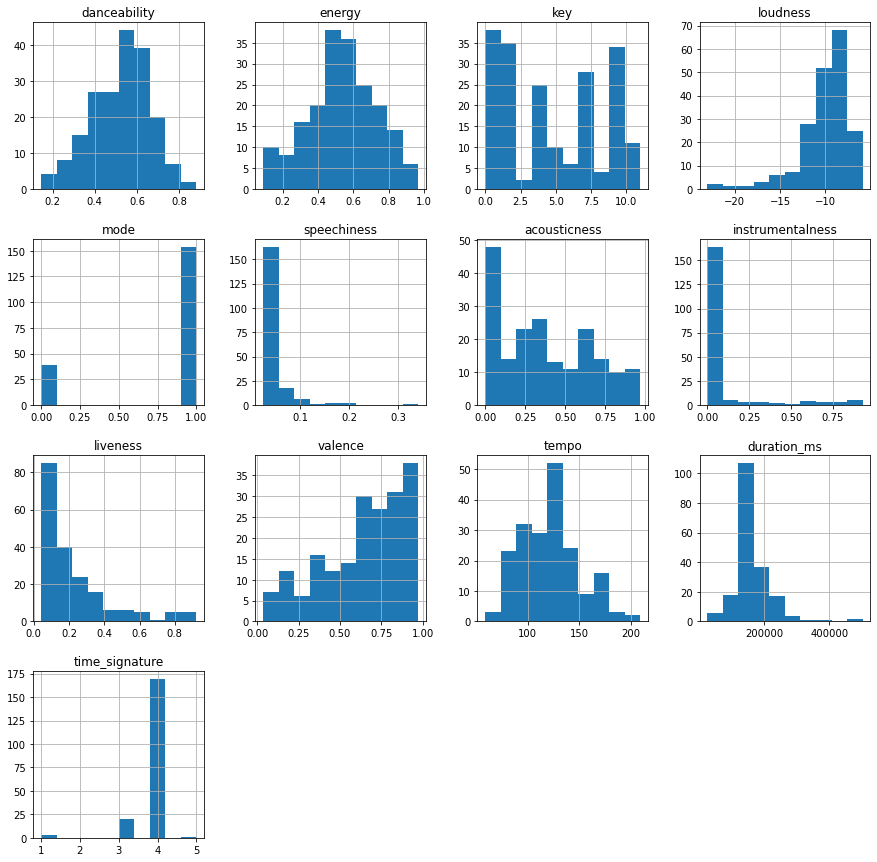

In [86]:
# histogram plot for each column
data.hist(figsize=(15,15));

In [74]:
# to convert the string into float
#data = data.apply(pd.to_numeric, errors='coerce')

## Preparing the data
The scale of "duration" is much higher than the scale of many other variables! K-Means is a distance based algorithm: we need to scale / normalize

Check out the docs for standardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Explore other methods for normalizing data: https://scikit-learn.org/stable/modules/preprocessing.html

In [87]:
# dropping the object columns
data_for_cluster = data.drop(['type','id','uri','track_href','analysis_url','song_name','artist'],axis = 1)

In [88]:
data_for_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.491,0.801,4,-9.835,1,0.0361,0.2700,0.00000,0.0665,0.971,160.109,173947,4
1,0.591,0.605,0,-10.925,1,0.0413,0.7070,0.00000,0.3090,0.882,133.348,108547,4
2,0.608,0.565,2,-11.060,1,0.0336,0.6350,0.00000,0.0601,0.835,109.286,177133,4
3,0.654,0.561,10,-10.551,1,0.0304,0.6080,0.00000,0.1290,0.929,129.884,145080,4
4,0.402,0.860,4,-10.310,1,0.0504,0.6070,0.00000,0.7360,0.822,142.445,146440,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.440,0.609,2,-8.824,1,0.0358,0.0715,0.00000,0.5820,0.364,165.156,217560,4
189,0.554,0.828,4,-6.435,1,0.0739,0.0307,0.00000,0.9070,0.888,90.950,173960,4
190,0.299,0.329,3,-10.096,1,0.0279,0.7560,0.01050,0.0559,0.392,132.282,218187,4
191,0.880,0.556,2,-10.773,1,0.0855,0.2400,0.04830,0.2400,0.955,128.542,152213,4


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
# scale your data with the standard scaler
data_prep = StandardScaler().fit_transform(data_for_cluster)

### Clustering 

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters we should have.

When randomness is involved, we better use a random seed so that we can reproduce our results. We can set this directly to the argument random_state.

In [91]:
from sklearn.cluster import KMeans

#define the model, fit the model to your data 

kmeans = KMeans(n_clusters=8,init = 'k-means++',random_state=40)
y_kmeans = kmeans.fit(data_prep)
y_kmeans

KMeans(random_state=40)

In [92]:
#look at the cluster centres 
y_kmeans.cluster_centers_

array([[ 3.56338535e-01, -1.30677359e+00, -2.31160060e-01,
        -9.41847400e-01,  5.03236280e-01, -2.33376021e-01,
         1.19785143e+00, -2.99193011e-01, -5.15473257e-01,
        -5.03871413e-01, -1.17562287e-01, -2.62226321e-01,
         2.16733650e-01],
       [ 3.86401018e-01,  5.52222705e-01, -7.72449975e-02,
         4.81046764e-01,  5.03236280e-01, -1.63092908e-01,
        -2.29959386e-01, -2.34708718e-01, -2.02945647e-01,
         6.59380423e-01,  9.29897407e-03, -2.41140520e-01,
         2.27383275e-01],
       [ 1.54523469e-01,  5.09917448e-01, -2.67849115e-01,
         3.07137628e-01,  5.03236280e-01,  5.76756303e-01,
        -2.81481557e-01,  3.85802086e-02,  2.36827815e+00,
         1.51566776e-01, -5.76901375e-01, -1.23271449e-01,
         1.73070190e-01],
       [-6.05166394e-01,  1.81890290e-01,  7.82792021e-01,
         2.22415662e-01, -8.55149762e-01,  9.27753239e-01,
        -3.26804854e-01,  4.00279880e-02, -2.28348749e-01,
        -1.20630694e-01,  1.18856336e

In [93]:
# Predicting / assigning the clusters:
clusters=y_kmeans.predict(data_prep)

In [94]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    24
1    82
2    16
3    11
4     1
5    23
6    25
7    11
dtype: int64

In [95]:
# Explore the cluster assignment by placing it in the original dataset
final_track=pd.DataFrame(data)
final_track['cluster']=clusters
final_track.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,cluster
0,0.491,0.801,4,-9.835,1,0.0361,0.270,0.000000,0.0665,0.971,...,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4,i saw her standing there,the beatles,1
1,0.591,0.605,0,-10.925,1,0.0413,0.707,0.000000,0.3090,0.882,...,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4,misery,the beatles,1
2,0.608,0.565,2,-11.060,1,0.0336,0.635,0.000000,0.0601,0.835,...,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4,anna (go to him),the beatles,1
3,0.654,0.561,10,-10.551,1,0.0304,0.608,0.000000,0.1290,0.929,...,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4,chains,the beatles,1
4,0.402,0.860,4,-10.310,1,0.0504,0.607,0.000000,0.7360,0.822,...,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4,boys,the beatles,2
5,0.605,0.394,4,-11.330,1,0.0378,0.767,0.000000,0.0967,0.597,...,audio_features,7529Z6b1rlGZFFPWjHPeV5,spotify:track:7529Z6b1rlGZFFPWjHPeV5,https://api.spotify.com/v1/tracks/7529Z6b1rlGZ...,https://api.spotify.com/v1/audio-analysis/7529...,146533,4,ask me why,the beatles,0
6,0.527,0.480,4,-9.610,1,0.0280,0.334,0.000000,0.0702,0.706,...,audio_features,6EHuOufBeL6vk3TvVJB5qo,spotify:track:6EHuOufBeL6vk3TvVJB5qo,https://api.spotify.com/v1/tracks/6EHuOufBeL6v...,https://api.spotify.com/v1/audio-analysis/6EHu...,120853,4,please please me,the beatles,1
7,0.520,0.829,0,-6.228,1,0.0806,0.386,0.000062,0.2270,0.744,...,audio_features,3VbGCXWRiouAq8VyMYN2MI,spotify:track:3VbGCXWRiouAq8VyMYN2MI,https://api.spotify.com/v1/tracks/3VbGCXWRiouA...,https://api.spotify.com/v1/audio-analysis/3VbG...,141693,4,love me do,the beatles,1
8,0.635,0.656,2,-8.500,1,0.0291,0.389,0.001270,0.0828,0.770,...,audio_features,7Msq9qojB7yORuJvz49iUy,spotify:track:7Msq9qojB7yORuJvz49iUy,https://api.spotify.com/v1/tracks/7Msq9qojB7yO...,https://api.spotify.com/v1/audio-analysis/7Msq...,124360,4,p.s. i love you,the beatles,1
9,0.608,0.494,4,-12.211,0,0.0345,0.778,0.000000,0.0926,0.879,...,audio_features,2VmB1rF9FtfKUmFHDVnq8Q,spotify:track:2VmB1rF9FtfKUmFHDVnq8Q,https://api.spotify.com/v1/tracks/2VmB1rF9FtfK...,https://api.spotify.com/v1/audio-analysis/2VmB...,160520,4,baby it's you,the beatles,6


In [96]:
# total inertia of all the centroids
kmeans.inertia_

1366.4691116061072

In [86]:
#to check the particular cluster
#final_track[final_track['cluster'] == 7]

In [87]:
#def beat_song():
    #beat_song=input("Which song do you really like?")
    #if beat_song in top100.song.values:
       # print("Oh! It's a Top 100! We recommend you :", random.choice(top100['song']))
    #else:
        #result = sp.search(beat_song, limit=1)
        #result_id = result['tracks']['items'][0]['id'] ## get the id # sp.
        #audio_f=sp.audio_features(result_id) #get audio features
        #audio_fdf=pd.DataFrame(audio_f)
        #audio_fdf2=audio_fdf.drop(['type','id','uri','track_href','analysis_url'],axis = 1)
        #scaled = StandardScaler().fit_transform(audio_fdf2)#scale the audio features
        #no_clus = kmeans.predict(scaled) #kmeans.predict(scaled) --> cluster_number
    #subset the big datatset to get just the songs from that cluster  df[df["cluster"]==cluster_number]
        #df_new = X_cluster[X_cluster['cluster'] == no_clus[0]]
    #get a random song from that subset
        #print("The song:", random.choice(df_new['song_name']))
    #print the result! everyone happy

In [97]:
# incorporating 2 functions
def beat_song():
    beat_song=input("Which song do you really like?")
    if beat_song in songs_top100.song.values:
        print("Oh! It's a Top 100! We recommend you :", random.choice(top100['song']))
    else:
        result = sp.search(beat_song, limit=1)
        result_id = result['tracks']['items'][0]['id'] 
        audio_f=sp.audio_features(result_id) 
        audio_fdf=pd.DataFrame(audio_f)
        audio_fdf2=audio_fdf.drop(['type','id','uri','track_href','analysis_url'],axis = 1)
        scaled = StandardScaler().fit_transform(audio_fdf2)
        no_clus = kmeans.predict(scaled) 
        df_new = final_track[final_track['cluster'] == no_clus[0]]
        print("So your song is not of the most popular songs of the moment, but don't worry! Here you have one by the:", random.choice(df_new['song_name']))
  

In [ ]:
beat_song()